In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
df = pd.read_csv('/Users/harsha/Desktop/Data Analyst Roadmap/Python/Untitled Folder/Sales Data.csv')

In [37]:
df.shape

(11251, 15)

In [42]:
# to drop the values using drop function
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [43]:
# to check whether there is null using isnull function
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
# to check whether there is null using with sum for showing null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [46]:
# to drop null values in data using dropna function and inplace is for saving the data
df.dropna(inplace=True)

In [47]:
df.shape

(11239, 13)

In [48]:
#changing the data type
df['Amount'] = df['Amount'].astype('int')

In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [55]:
df= df.rename(columns = {'Cust_name':'Customer_Name'})

In [56]:
df.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [58]:
df[['Age', 'Amount', 'Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


In [64]:
print('Exploratory Data Analysis')

Exploratory Data Analysis


In [63]:
df.columns

Index(['User_ID', 'Customer_Name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

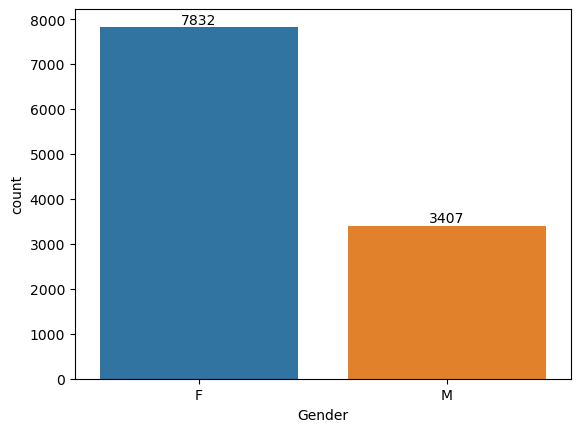

In [68]:
#Gender plot with Values
Gender_Count = sns.countplot(x = 'Gender', data = df)
for bars in Gender_Count.containers:
    Gender_Count.bar_label(bars)

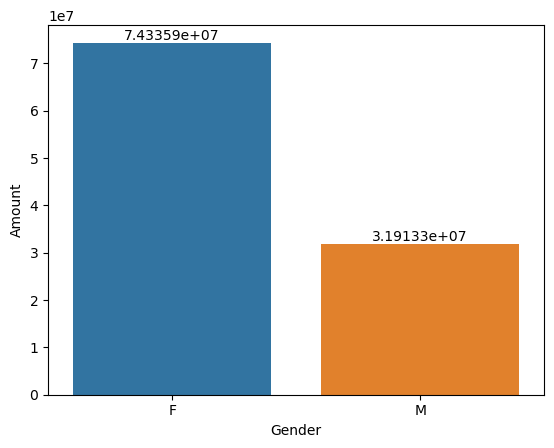

In [73]:
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

Sales_Gen = sns.barplot(x = 'Gender',y= 'Amount', data = sales_gender)
for bars in Sales_Gen.containers:
    Sales_Gen.bar_label(bars)

In [74]:
#From the above graphs it states that Female buyers are more than male buyers
#Even Female buyers leads in the purchasing power analysis.

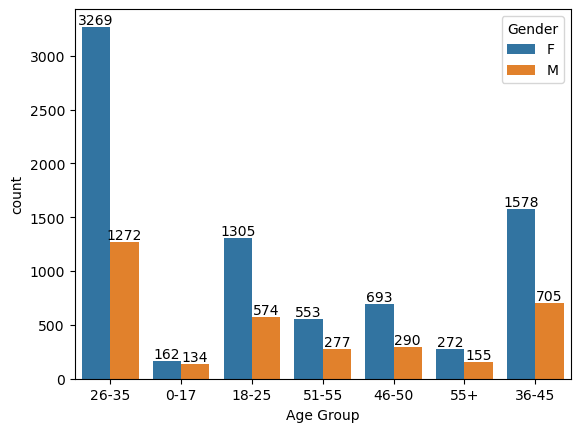

In [75]:
#AGE
Age = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in Age.containers:
    Age.bar_label(bars)

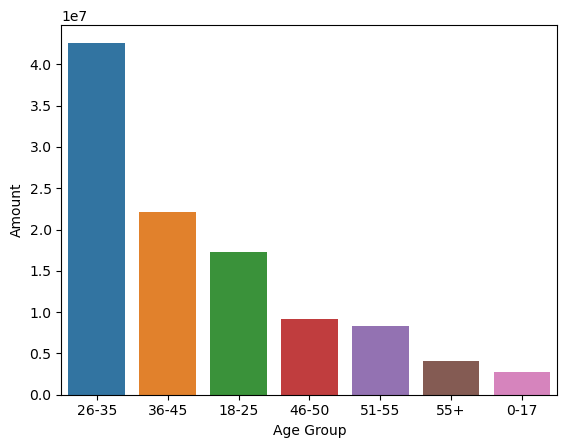

In [78]:
#Total Amount vs Age Group

Sales_Age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sa = sns.barplot(x = 'Age Group', y = 'Amount', data = Sales_Age)


In [79]:
# From the above graphs we can conclude that most of the buyers are in the age group of 26-35

<Axes: xlabel='State', ylabel='Orders'>

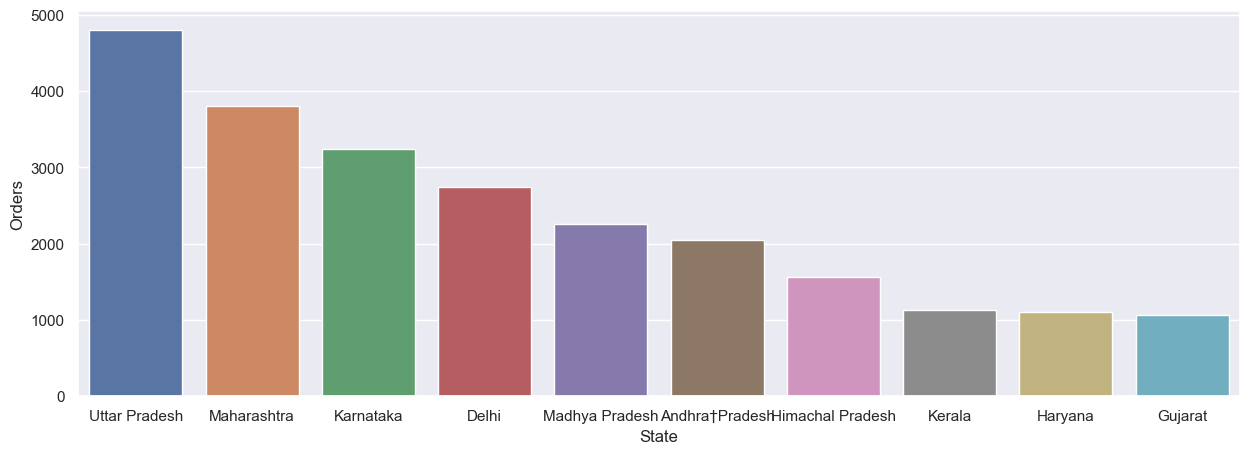

In [81]:
#State
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize' : (15,5)})
sns.barplot(data = sales_state, x ='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

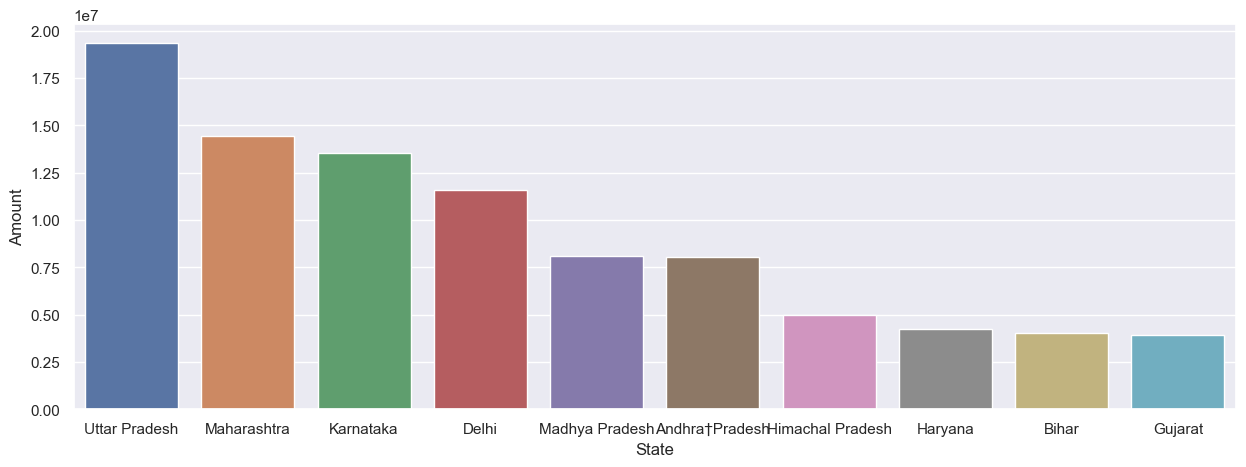

In [82]:
# Total Amount/Sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize' : (15,5)})
sns.barplot(data = sales_state, x ='State',y='Amount')

In [83]:
# From the above graph we see that most of the order and most of sales are from Uttar Pradesh,
# Maharashtra, and Karnataka.

In [84]:
# Marital Status

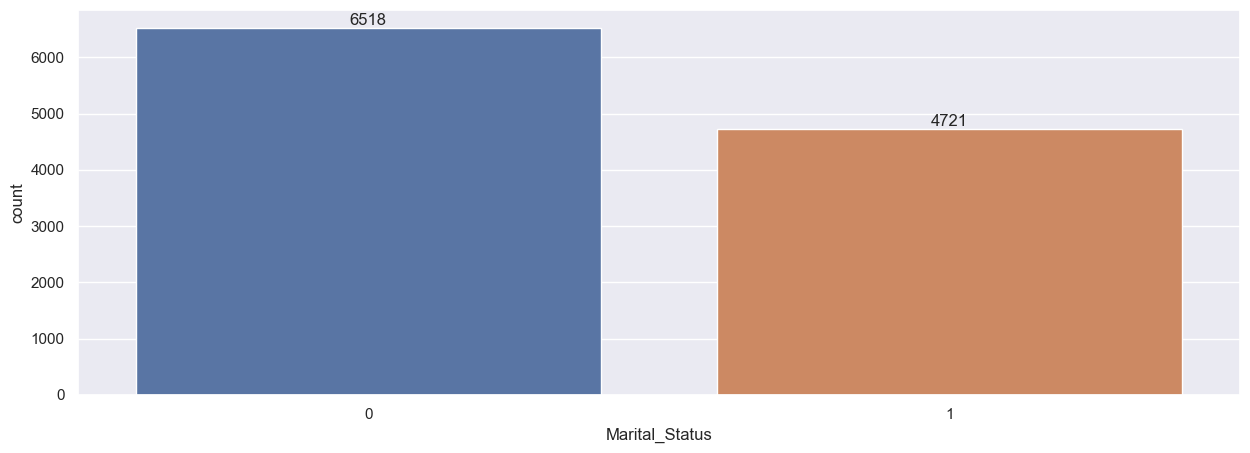

In [85]:
ms = sns.countplot(data = df, x = 'Marital_Status')
for bars in ms.containers:
    ms.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

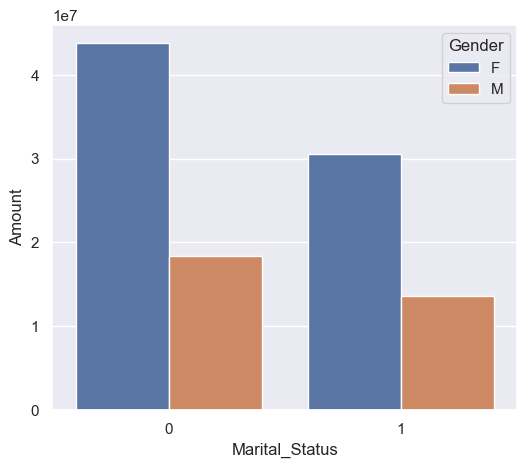

In [87]:
Sales_State = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=Sales_State, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

In [88]:
# Here 0 = Married and 1 = Single. So, From the above graphs we see that most of the buyers are
# Married women with high purchasing power

In [89]:
#Occupation

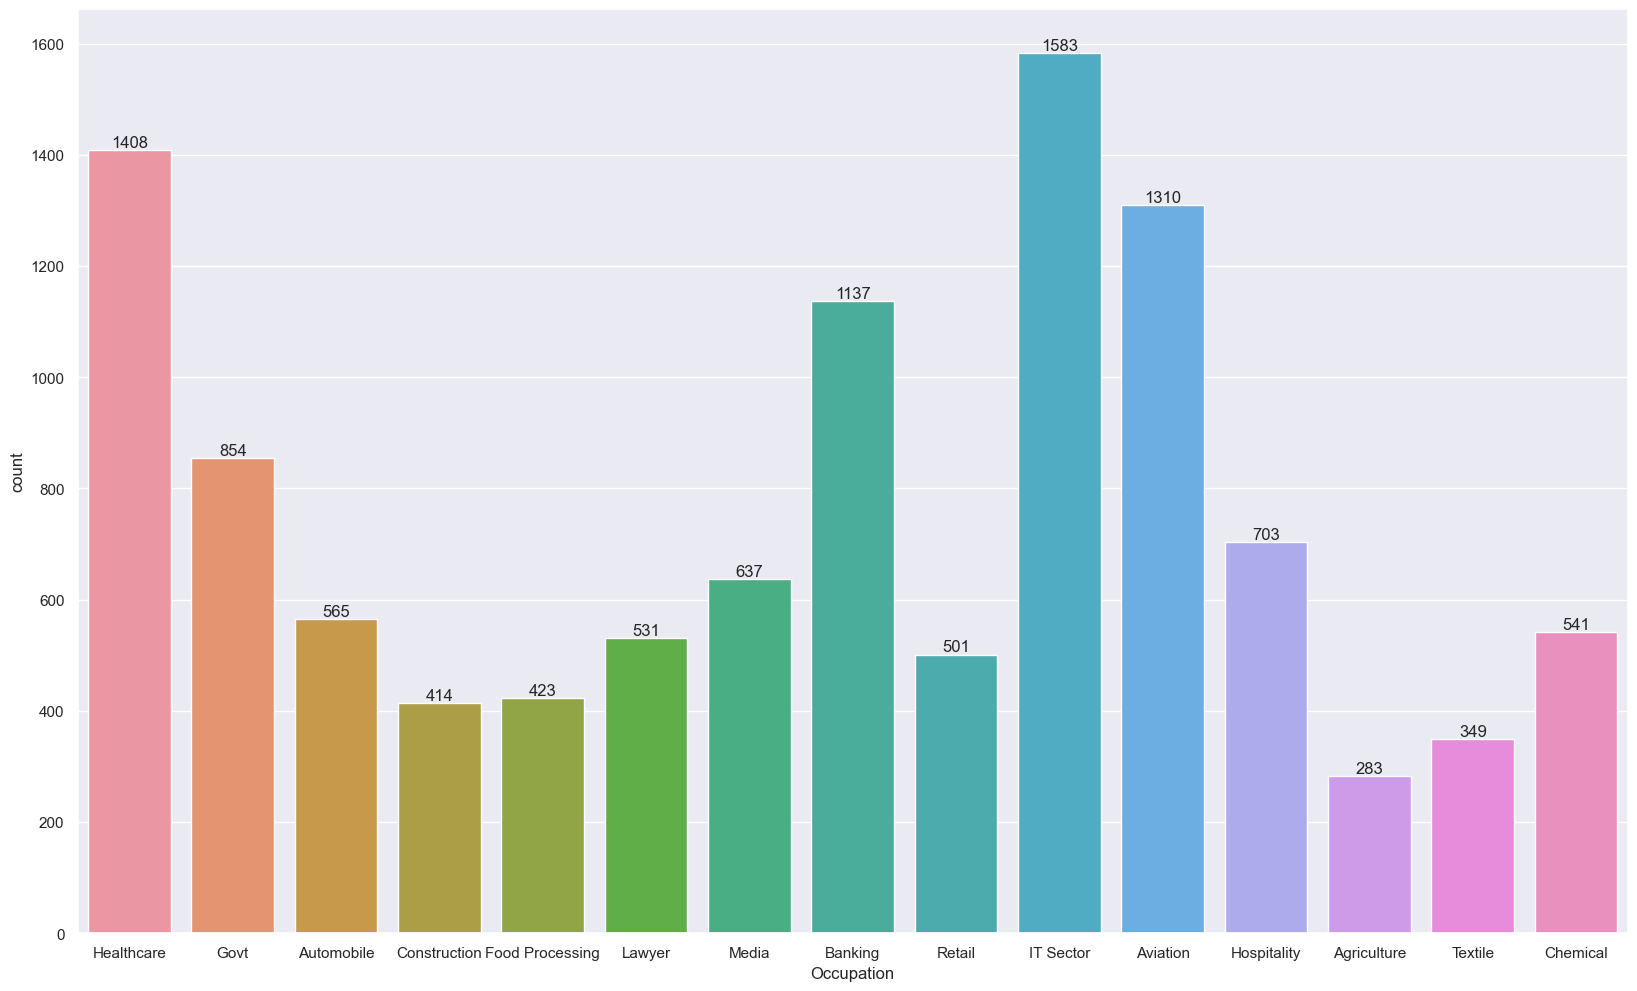

In [97]:
sns.set(rc={'figure.figsize': (20,12)})
oc= sns.countplot(data = df, x = 'Occupation')
for bars in oc.containers:
    oc.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

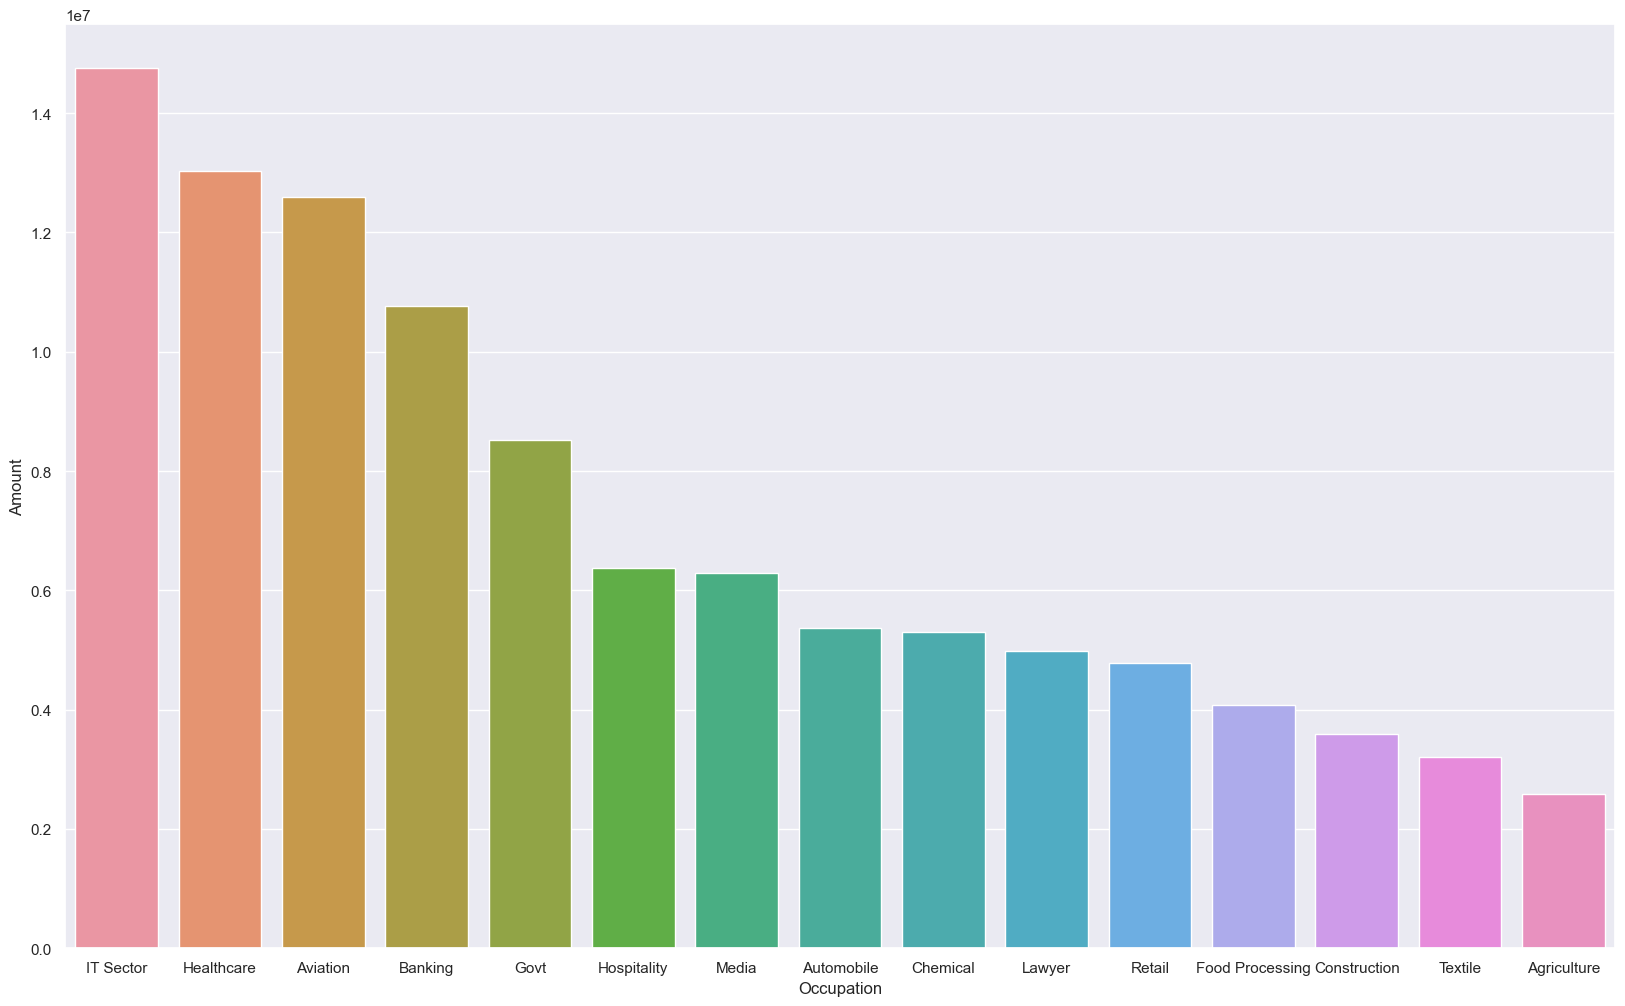

In [101]:
SS = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize' : (20,12)})
sns.barplot(data = SS, x = 'Occupation', y = 'Amount')

In [102]:
# From the above graphs we can see that most of the buyers are from IT Secotr, Healthcare and aviation.

In [103]:
#Product Category

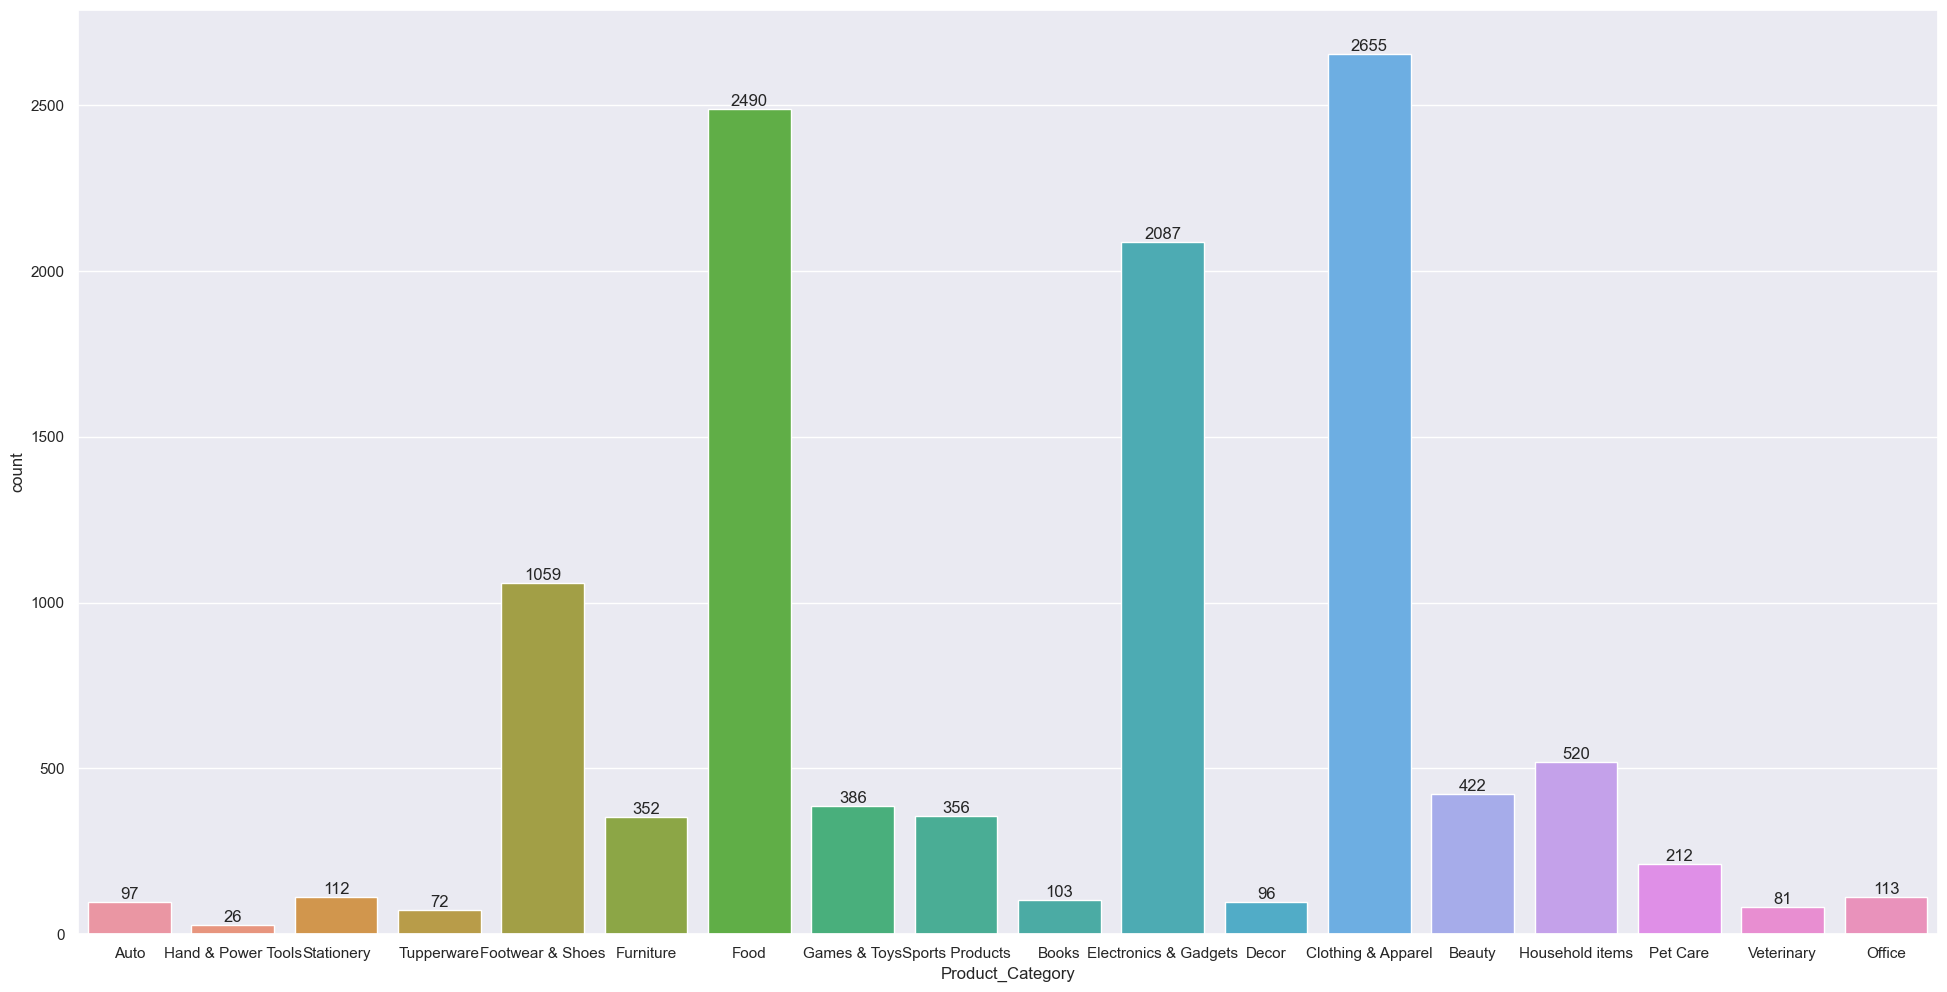

In [107]:
sns.set(rc={'figure.figsize': (24,12)})
pc = sns.countplot(data = df, x = 'Product_Category')
for bars in pc.containers:
    pc.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

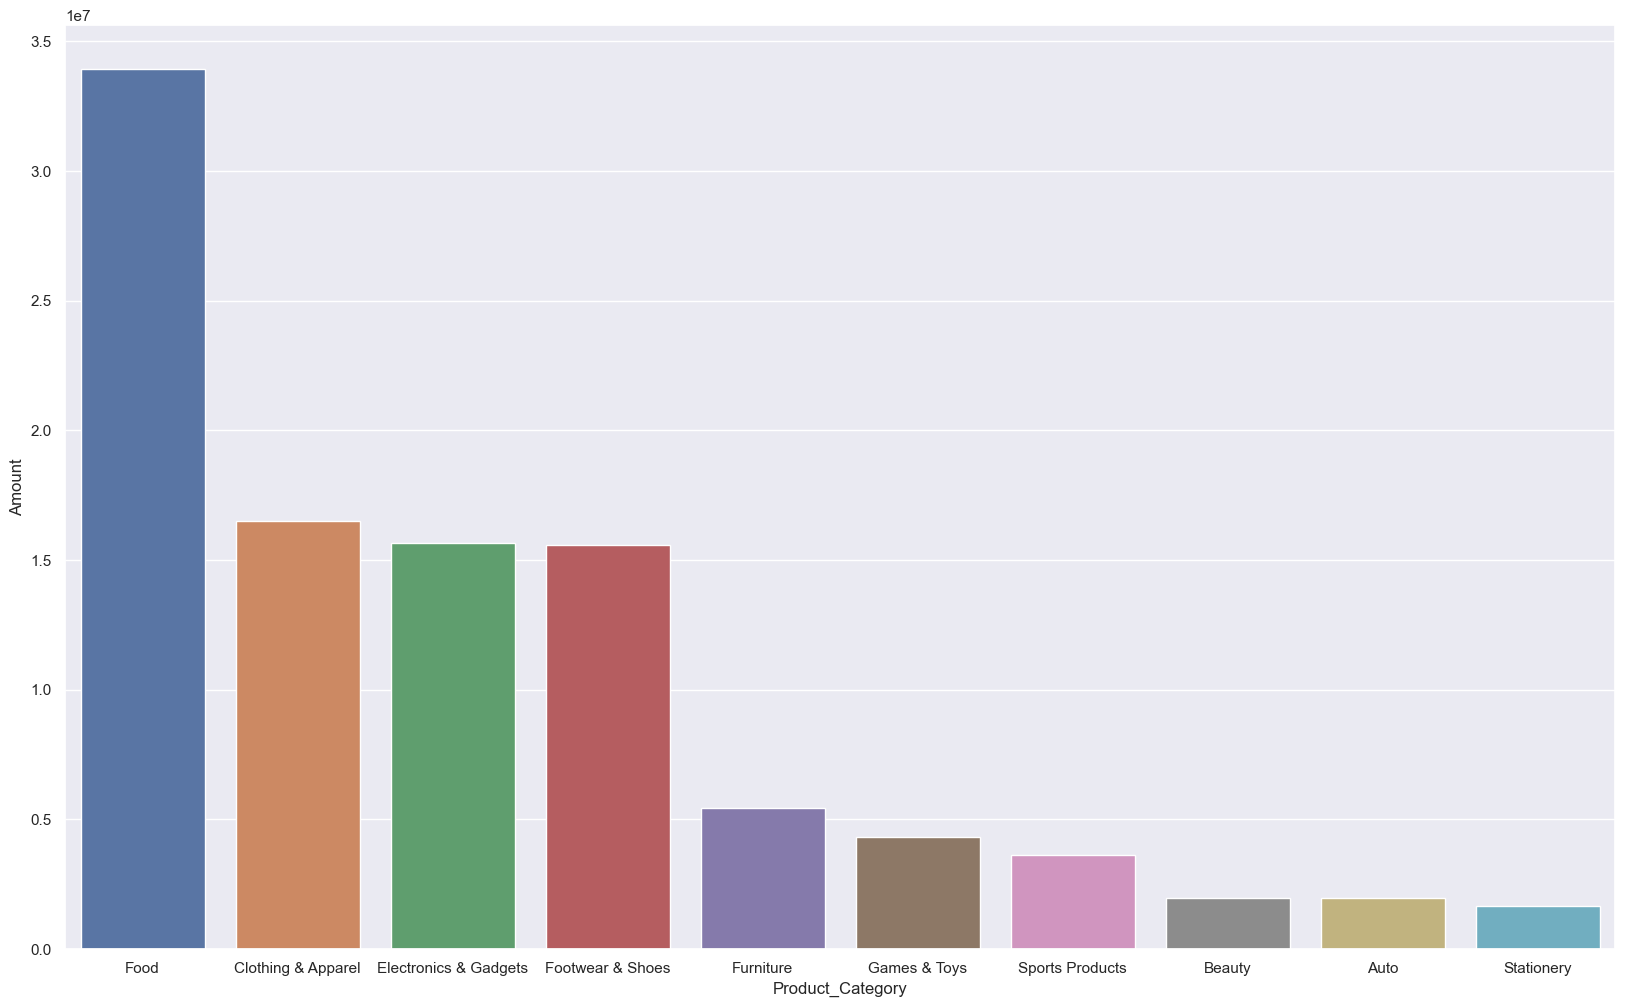

In [111]:
PC = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize' : (20,12)})
sns.barplot(data = PC, x = 'Product_Category', y = 'Amount')

In [110]:
#from the above graph we see that most of the products sold in Food, clothing & Apparel and Electroncis Category.

In [ ]:
#Conclusion: Married Women in the age group between 26 - 35 years from UP, Maharashtra and
# Karnataka working in IT, Aviaiton and Healthcare are more likely to buy products in 
# Food, Clothing and Electronics Category.